<a href="https://colab.research.google.com/github/Niggl0n/G-ResearchCryptoPrediction/blob/main/get_gresearch_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"test test ts"

'test test ts'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Github/GResearch_data/

/content/gdrive/MyDrive/Github/GResearch_data


In [ ]:
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
# link to all dataset: https://www.kaggle.com/c/g-research-crypto-forecasting/discussion/285726

# ! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-iota
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-binance-coin
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-bitcoin-cash
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-bitcoin
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-cardano
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-dogecoin
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-eos-io
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-ethereum
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-ethereum-classic
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-litecoin
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-monero
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-maker
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-stellar
! kaggle datasets download -d yamqwe/cryptocurrency-extra-data-tron




100% 1.16G/1.16G [00:46<00:00, 33.1MB/s]
100% 1.16G/1.16G [00:46<00:00, 27.1MB/s]
100% 1.17G/1.17G [00:44<00:00, 23.9MB/s]
100% 1.17G/1.17G [00:44<00:00, 28.2MB/s]
 99% 1.20G/1.21G [00:44<00:00, 19.8MB/s]
100% 1.21G/1.21G [00:44<00:00, 29.1MB/s]
100% 1.17G/1.17G [00:45<00:00, 24.4MB/s]
100% 1.17G/1.17G [00:45<00:00, 27.4MB/s]
 99% 1.09G/1.10G [00:46<00:00, 18.1MB/s]
100% 1.10G/1.10G [00:46<00:00, 25.1MB/s]
100% 1.17G/1.18G [00:46<00:00, 28.5MB/s]
100% 1.18G/1.18G [00:46<00:00, 27.0MB/s]
100% 1.19G/1.19G [01:24<00:00, 14.1MB/s]
100% 1.19G/1.19G [01:24<00:00, 15.1MB/s]
100% 1.17G/1.17G [00:54<00:00, 34.8MB/s]
100% 1.17G/1.17G [00:54<00:00, 23.1MB/s]
100% 1.17G/1.17G [01:09<00:00, 46.0MB/s]
100% 1.17G/1.17G [01:10<00:00, 18.0MB/s]
100% 1.12G/1.12G [00:45<00:00, 35.3MB/s]
100% 1.12G/1.12G [00:45<00:00, 26.5MB/s]
 99% 1.06G/1.07G [00:38<00:00, 46.1MB/s]
100% 1.07G/1.07G [00:39<00:00, 29.5MB/s]
 99% 1.16G/1.16G [01:35<00:00, 46.6MB/s]
100% 1.16G/1.16G [01:35<00:00, 13.0MB/s]
100% 1.17G/1.17G

In [ ]:
# ! unzip /content/gdrive/MyDrive/Github/cryptocurrency-extra-data-iota.zip

! unzip \*.zip

Archive:  /content/gdrive/MyDrive/Github/cryptocurrency-extra-data-iota.zip
  inflating: full_data__8__2018.csv  
  inflating: full_data__8__2018.jay  
  inflating: full_data__8__2019.csv  
  inflating: full_data__8__2019.jay  
  inflating: full_data__8__2020.csv  
  inflating: full_data__8__2020.jay  
  inflating: full_data__8__2021.csv  
  inflating: full_data__8__2021.jay  
  inflating: orig_asset_details.jay  
  inflating: orig_example_sample_submission.jay  
  inflating: orig_example_test.jay   
  inflating: orig_supplemental_train.jay  
  inflating: orig_train.jay          



## Todos

- Save model
- check for other necessray callbacks
- run version 8 with 16 shift
- Embedding
    - evaluate embedding
    - run new embedding version on full asset data
    - search an try alternatives
        - add sin / cos signals
- Check for other LR scheduler
- Read for decoder necessety 

## Kernel

In [ ]:
from IPython.core.display import display, HTML, Javascript
import os
if not os.path.exists("../input/g-research-crypto-forecasting/"): os.chdir('/t/Datasets/kaggle_crypto/internal')


In [ ]:
import os
import gc
import traceback
import pdb
import numpy as np
import pandas as pd
import seaborn as sns
import gresearch_crypto
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from scipy.stats import pearsonr
from tensorflow.keras import layers
from sklearn.metrics import r2_score
import tensorflow_probability as tfp
import tensorflow.keras.backend as K
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)

In [ ]:
DEVICE = "GPU" #or "TPU"

SEED = 42

# LOAD STRICT? YES=1 NO=0 | see: https://www.kaggle.com/julian3833/proposal-for-a-meaningful-lb-strict-lgbm
LOAD_STRICT = True

# WHICH YEARS TO INCLUDE? YES=1 NO=0
INC2021 = 0
INC2020 = 0
INC2019 = 0
INC2018 = 0
INC2017 = 0
INCCOMP = 1
INCSUPP = 0

# TRAINING PARAMETERS
DEBUG = True
SINGLE_ASSET = True
asset_id=3
N_ASSETS = 14
num_shift = 5
TIME2VEC_DIM=3
WINDOW_SIZE = 64
prediction_length = 1
BATCH_SIZE = 64
PCT_VALIDATION = 10 # last 10% of the data are used as validation set
PCT_TEST = 10 # last 10% of the data are used as validation set

In [ ]:
if DEVICE == "TPU":
    print("connecting to TPU...")
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.master())
    except ValueError:
        tpu = None
    if tpu:
        try:
            print("initializing  TPU ...")
            tf.config.experimental_connect_to_cluster(tpu)
            tf.tpu.experimental.initialize_tpu_system(tpu)
            strategy = tf.distribute.experimental.TPUStrategy(tpu)
            print("TPU initialized")
        except: print("failed to initialize TPU")
    else: DEVICE = "GPU"

if DEVICE != "TPU": strategy = tf.distribute.get_strategy()
if DEVICE == "GPU": print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
AUTO     = tf.data.experimental.AUTOTUNE
REPLICAS = strategy.num_replicas_in_sync

Num GPUs Available:  1


2022-02-16 23:47:29.987944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 23:47:30.097080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 23:47:30.097929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [ ]:
def compute_target(df):
    """
    
    """
    R=list()
    c=list(df['Close'])
    for i in range(df.shape[0]):
        future=c[min([i+16,df.shape[0]-1])]
        past=c[min([i+1,df.shape[0]-1])]
        R.append(future/past)
    df['R']=R
    df['R']=np.log(df['R'])
    df['pred']=np.exp(df['R'])-1
    return df


# we will use weighted correlation as function to evaluate our model performance
# https://stackoverflow.com/questions/38641691/weighted-correlation-coefficient-with-pandas
def wmean(x, w):
    return np.sum(x * w) / np.sum(w)

def wcov(x, y, w):
    return np.sum(w * (x - wmean(x, w)) * (y - wmean(y, w))) / np.sum(w)

def wcorr(x, y, w):
    return wcov(x, y, w) / np.sqrt(wcov(x, x, w) * wcov(y, y, w))

def wcorr(x, y, w=1):
    return wcov(x, y, w) / np.sqrt(wcov(x, x, w) * wcov(y, y, w))

# ----------------------------------------------------------------
# ----------------------------------------------------------------
# def tf_wmean(x, w):
#     w_sum = tf.math.reduce_sum(w)
#     xw_sum = tf.math.reduce_sum(tf.math.multiply(x, w))
#     return  tf.math.divide(xw_sum, w_sum)
# 
# def tf_wcov(x, y, w):
#     w_sum = tf.math.reduce_sum(w)
#     xyw = tf.math.multiply(x - tf_wmean(x, w), y - tf_wmean(y, w))
#     w_xy_sum= tf.math.reduce_sum(tf.math.multiply(w, xyw))
#     return  tf.math.divide(w_xy_sum, w_sum)
# 
# def tf_wcorr(x, y, w=1):
#     if not w:
#         w=1.
#     x = tf.cast(x, tf.float32)
#     y = tf.cast(y, tf.float32)
#     w = tf.cast(w, tf.float32)
#     
#     mul_xwcov_y_wcov = tf.math.multiply(tf_wcov(x, x, w), tf_wcov(y, y, w))
#     return tf.math.divide(tf_wcov(x, y, w), tf.math.sqrt(mul_xwcov_y_wcov))


from functools import partial

def corr_loss(y_true, y_pred):
    x = tf.cast(y_true, tf.float32)
    y = tf.cast(y_pred, tf.float32)
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return - r

def combined_loss(y_true, y_pred, weight1=0.5, weight2=None):
    if not weight2:
        weight2 = 1 - weight1
    loss1 = corr_loss(y_true, y_pred)
    mae_loss_ = tf.keras.losses.MeanAbsoluteError()
    loss2 = mae_loss_(y_true, y_pred)
    return loss1*weight1 + loss2*weight2


def competition_weighted_correlation(a, b, weights=1):

    #w = np.ravel(weights)
    #a = np.ravel(a)
    #b = np.ravel(b)
    a = tf.cast(a, dtype=tf.float32)
    b = tf.cast(b, dtype=tf.float32)
    
    len_a = tf.cast(tf.size(a), dtype=tf.float32)
    len_b = tf.cast(tf.size(b), dtype=tf.float32)
    #sum_w = tf.reduce_sum(w)
    mean_a = tf.cast(tf.math.reduce_mean(a), dtype=tf.float32)
    mean_b = tf.cast(tf.math.reduce_mean(b), dtype=tf.float32)
    var_a = tf.cast(tf.math.reduce_sum(tf.math.square(a - mean_a)) / len_a, dtype=tf.float32)
    var_b = tf.cast(tf.math.reduce_sum(tf.math.square(b - mean_b)) / len_b, dtype=tf.float32)

    cov = tf.math.reduce_sum((a * b)) / len_a - (mean_a * mean_b)
    corr = cov / tf.math.sqrt(var_a * var_b)

    return corr

In [ ]:
import datatable as dt
extra_data_files = {0: '../input/cryptocurrency-extra-data-binance-coin', 2: '../input/cryptocurrency-extra-data-bitcoin-cash', 1: '../input/cryptocurrency-extra-data-bitcoin', 3: '../input/cryptocurrency-extra-data-cardano', 4: '../input/cryptocurrency-extra-data-dogecoin', 5: '../input/cryptocurrency-extra-data-eos-io', 6: '../input/cryptocurrency-extra-data-ethereum', 7: '../input/cryptocurrency-extra-data-ethereum-classic', 8: '../input/cryptocurrency-extra-data-iota', 9: '../input/cryptocurrency-extra-data-litecoin', 11: '../input/cryptocurrency-extra-data-monero', 10: '../input/cryptocurrency-extra-data-maker', 12: '../input/cryptocurrency-extra-data-stellar', 13: '../input/cryptocurrency-extra-data-tron'}

# Uncomment to load the original csv [slower]
# orig_df_train = pd.read_csv(data_path + 'train.csv') 
# supp_df_train = pd.read_csv(data_path + 'supplemental_train.csv')
# df_asset_details = pd.read_csv(data_path  + 'asset_details.csv').sort_values("Asset_ID")

orig_df_train = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_train.jay').to_pandas()
df_asset_details = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_asset_details.jay').to_pandas()
supp_df_train = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_supplemental_train.jay').to_pandas()
assets_details = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_asset_details.jay').to_pandas()
asset_weight_dict = {assets_details['Asset_ID'].tolist()[idx]: assets_details['Weight'].tolist()[idx] for idx in range(len(assets_details))}
asset_name_dict = {assets_details['Asset_ID'].tolist()[idx]: assets_details['Asset_Name'].tolist()[idx] for idx in range(len(assets_details))}

def load_training_data_for_asset(asset_id, load_jay = True):
    dfs = []
    if INCCOMP: dfs.append(orig_df_train[orig_df_train["Asset_ID"] == asset_id].copy())
    if INCSUPP: dfs.append(supp_df_train[supp_df_train["Asset_ID"] == asset_id].copy())
    
    if load_jay:
        if INC2017 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2017) + '.csv'): dfs.append(dt.fread(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2017) + '.jay').to_pandas())
        if INC2018 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2018) + '.csv'): dfs.append(dt.fread(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2018) + '.jay').to_pandas())
        if INC2019 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2019) + '.csv'): dfs.append(dt.fread(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2019) + '.jay').to_pandas())
        if INC2020 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2020) + '.csv'): dfs.append(dt.fread(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2020) + '.jay').to_pandas())
        if INC2021 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2021) + '.csv'): dfs.append(dt.fread(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2021) + '.jay').to_pandas())
    else: 
        if INC2017 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2017) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2017) + '.csv'))
        if INC2018 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2018) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2018) + '.csv'))
        if INC2019 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2019) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2019) + '.csv'))
        if INC2020 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2020) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2020) + '.csv'))
        if INC2021 and os.path.exists(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2021) + '.csv'): dfs.append(pd.read_csv(extra_data_files[asset_id] + '/full_data__' + str(asset_id) + '__' + str(2021) + '.csv'))
    df = pd.concat(dfs, axis = 0) if len(dfs) > 1 else dfs[0]
    df['date'] = pd.to_datetime(df['timestamp'], unit = 's')
    if LOAD_STRICT: df = df.loc[df['date'] < "2021-06-13 00:00:00"]    
    df = df.sort_values('date')
    return df

def load_data_for_all_assets():
    dfs = []
    for asset_id in list(extra_data_files.keys()): dfs.append(load_training_data_for_asset(asset_id))
    return pd.concat(dfs)

In [ ]:
test = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_example_test.jay').to_pandas()
sample_prediction_df = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_example_sample_submission.jay').to_pandas()
assets = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_asset_details.jay').to_pandas()
assets_order = dt.fread('../input/cryptocurrency-extra-data-binance-coin/orig_supplemental_train.jay').to_pandas().Asset_ID[:N_ASSETS]

assets_order = dict((t,i) for i,t in enumerate(assets_order))
print("Loaded all data!")

Loaded all data!


In [ ]:
train = load_data_for_all_assets().sort_values('timestamp').set_index("timestamp")
if DEBUG: 
    train = train[-500000:]  # [-2221694:]  #
else:
    train = train[1000000:]
print(train.shape)

(500000, 10)


In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype.name
        
        if col_type not in ['object', 'category', 'datetime64[ns, UTC]', 'datetime64[ns]']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


In [ ]:
def upper_shadow(df): return df['High'] - np.maximum(df['Close'], df['Open'])
def lower_shadow(df): return np.minimum(df['Close'], df['Open']) - df['Low']

def get_features(df, row = False):
    df_feat = df
    df_feat['spread'] = df_feat['High'] - df_feat['Low']
    df_feat['mean_trade'] = df_feat['Volume']/df_feat['Count']
    df_feat['log_price_change'] = np.log(df_feat['Close']/df_feat['Open'])
    df_feat['upper_Shadow'] = upper_shadow(df_feat)
    df_feat['lower_Shadow'] = lower_shadow(df_feat)
    df_feat["high_div_low"] = df_feat["High"] / df_feat["Low"]
    df_feat['UPS'] = (df_feat['High'] - np.maximum(df_feat['Close'], df_feat['Open']))
    df_feat['LOS'] = (np.minimum(df_feat['Close'], df_feat['Open']) - df_feat['Low'])
    df_feat['LOGVOL'] = np.log(1. + df_feat['Volume'])
    df_feat['LOGCNT'] = np.log(1. + df_feat['Count'])
    return df_feat


# A utility function to build features around lags.
def get_features_hist(df_feat, row=False):
    
    ### features to consider. See potential features...
    ### note that we predicting returns 15 minutes ahead. This minutes price data is therefore not sufficient. We must roll the variables, 15, 30, 90, 250, 1250
       
    # df_feat = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Count', 'VWAP', 'lr15', 'm', 'lr16', 'Asset_ID']].copy()

    if df_feat.shape[0]<3750:
        df_feat['beta_num'] = np.nan
        df_feat['m2'] = np.nan
    else:
        df_feat['beta_num'] = (df_feat['lr15']*df_feat['m']).rolling(3750).mean().values
        df_feat['m2'] = (df_feat['m']*df_feat['m']).rolling(3750).mean().values
        
    if row:
        # first .iloc as far back as we need, compute feature, then downsize until .iloc[-1]
        df_feat = df_feat.iloc[-1]
#         mean_price = df_feat[['Open', 'High', 'Low', 'Close']].mean()
#         med_price = df_feat[['Open', 'High', 'Low', 'Close']].median()
        df_feat['upper_shadow'] = df_feat['High'] / df_feat[['Close', 'Open']].max()
        df_feat['lower_shadow'] = df_feat[['Close', 'Open']].min() / df_feat['Low']
    else:
#         mean_price = df_feat[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#         med_price = df_feat[['Open', 'High', 'Low', 'Close']].median(axis=1)
        df_feat['upper_shadow'] = df_feat['High'] / df_feat[['Close', 'Open']].max(axis=1)
        df_feat['lower_shadow'] = df_feat[['Close', 'Open']].min(axis=1) / df_feat['Low']
        # df_feat = df_feat.drop('Asset_ID', axis=1)
        
    df_feat['beta'] = np.nan_to_num(df_feat['beta_num'] / df_feat['m2'], nan=0., posinf=0., neginf=0.)
    df_feat['target_lag'] = df_feat['lr15'] - df_feat['beta']*df_feat['m']  # first 15 entries of target_lagg are NaN

        ### Sense checks
#         print((df_feat['Target'] - df_feat.groupby('Asset_ID')['target_lag'].shift(-16)).abs().mean())
#         print(df_feat.loc[(df_feat.Target.isnull())&(df_feat.target_lag.notnull())].shape)
#         print(df_feat.loc[(df_feat.Target.notnull())&(df_feat.target_lag.isnull())].shape)        
        
    df_feat['open2close'] = df_feat['Close'] / df_feat['Open']
    df_feat['high2low'] = df_feat['High'] / df_feat['Low']
           
#     df_feat['high2mean'] = df_feat['High'] / mean_price
#     df_feat['low2mean'] = df_feat['Low'] / mean_price
#     df_feat['high2median'] = df_feat['High'] / med_price
#     df_feat['low2median'] = df_feat['Low'] / med_price
    df_feat['volume2count'] = df_feat['Volume'] / (df_feat['Count'] + 1)
    df_feat['close2vwap'] = df_feat['Close'] / df_feat['VWAP']
    
    return df_feat.replace([np.inf, -np.inf], np.nan)

def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

def timestamp_to_date(timestamp):
    return(datetime.fromtimestamp(timestamp))

def get_lead_features():
    # get_features from ethereum
    pass



In [ ]:
## FILTER DATAFRAME IF ONLY WORKING WITH ONE ASSET
if SINGLE_ASSET:
    train = train[train["Asset_ID"]==asset_id]
gc.collect()

24

In [ ]:
train[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Target']] = train[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Target']].astype(np.float32)
print(train.shape)
train['Target'] = train['Target'].fillna(0)
VWAP_max = np.max(train[np.isfinite(train.VWAP)].VWAP)
VWAP_min = np.min(train[np.isfinite(train.VWAP)].VWAP)
train['VWAP'] = np.nan_to_num(train.VWAP, posinf=VWAP_max, neginf=VWAP_min)
df = train[['Asset_ID', 'Target']].copy()
times = dict((t,i) for i,t in enumerate(df.index.unique()))
df['id'] = df.index.map(times)
df['id'] = df['id'].astype(str) + '_' + df['Asset_ID'].astype(str)
ids = df.id.copy()
del df

train = train.sort_index()
ind = train.index.unique()
def reindex(df):
    df = df.reindex(range(ind[0],ind[-1]+60,60),method='nearest')
    df = df.fillna(method="ffill").fillna(method="bfill")
    return df
train = train.groupby('Asset_ID').apply(reindex).reset_index(0, drop=True).sort_index()
gc.collect()
print(train.shape)

# Matching records and marking generated rows as 'non-real'
print(train.shape)
train['group_num'] = train.index.map(times)
train = train.dropna(subset=['group_num'])
train['group_num'] = train['group_num'].astype('int')
train['id'] = train['group_num'].astype(str) + '_' + train['Asset_ID'].astype(str)
train['is_real'] = train.id.isin(ids) * 1
train = train.drop('id', axis=1)
print(train.shape)

(35716, 10)
(35717, 10)
(35717, 10)
(35716, 12)


In [ ]:
train['asset_order'] = train.Asset_ID.map(assets_order)
train = train.sort_values(by=['group_num', 'asset_order'])
# train = reduce_mem_usage(train)
gc.collect()

23

In [ ]:
if train.index.name == "timestamp":
    train = train.reset_index()
train['lr15'] = train.groupby('Asset_ID')['Close'].apply(lambda x: log_return(x, 15))
train['lr16'] = train.groupby('Asset_ID')['Close'].apply(lambda x: log_return(x, 16))
train = train.merge(df_asset_details[['Asset_ID','Weight']], how='left', on = 'Asset_ID')
train['m'] = train['lr15']*train['Weight']
train['m'] = train.groupby('timestamp')['m'].transform('sum') / np.sum(df_asset_details['Weight'])

train.head(20)

timestamp  Asset_ID    Count      Open      High       Low     Close  \
0   1621399380         3  13863.0  1.642700  1.649500  1.611000  1.623511   
1   1621399440         3   9173.0  1.623793  1.654195  1.615200  1.645859   
2   1621399500         3   9524.0  1.645627  1.673242  1.617400  1.664102   
3   1621399560         3   7761.0  1.663457  1.669406  1.631900  1.640231   
4   1621399620         3   6559.0  1.640461  1.664600  1.635679  1.658525   
5   1621399680         3   5590.0  1.658125  1.671800  1.643700  1.657311   
6   1621399740         3   8552.0  1.657763  1.660800  1.620500  1.639733   
7   1621399800         3   7144.0  1.640014  1.656900  1.628995  1.648322   
8   1621399860         3   8980.0  1.647378  1.649000  1.615000  1.628970   
9   1621399920         3  10643.0  1.630148  1.635000  1.600000  1.610441   
10  1621399980         3   9123.0  1.610199  1.620600  1.590000  1.599522   
11  1621400040         3   8817.0  1.598771  1.608200  1.585420  1.594127   
12  1621400100         3   9643.0  1.593979  1.609100  1.580200  1.602591   
13  1621400160         3   9587.0  1.602049  1.620000  1.583223  1.604161   
14  1621400220         3   8442.0  1.604467  1.635300  1.590800  1.625749   
15  1621400280         3   9203.0  1.626747  1.654680  1.614000  1.646023   
16  1621400340         3   7288.0  1.644431  1.665100  1.635800  1.660292   
17  1621400400         3   7925.0  1.660577  1.690000  1.658100  1.683223   
18  1621400460         3  10511.0  1.684452  1.715800  1.682200  1.705574   
19  1621400520         3  10550.0  1.704350  1.707674  1.676489  1.680776   

         Volume      VWAP    Target                date  group_num  is_real  \
0   10208457.00  1.627059  0.006264 2021-05-19 04:43:00          0        1   
1    6408643.00  1.640546  0.010261 2021-05-19 04:44:00          1        1   
2    6283014.50  1.647340  0.016606 2021-05-19 04:45:00          2        1   
3    4516063.00  1.650989  0.013718 2021-05-19 04:46:00          3        1   
4    4456316.50  1.651940  0.021053 2021-05-19 04:47:00          4        1   
5    3973633.75  1.655983  0.023950 2021-05-19 04:48:00          5        1   
6    4245567.50  1.643210  0.021678 2021-05-19 04:49:00          6        1   
7    3585431.25  1.644723  0.026200 2021-05-19 04:50:00          7        1   
8    5622760.00  1.628477  0.027583 2021-05-19 04:51:00          8        1   
9    7331379.50  1.614531  0.028171 2021-05-19 04:52:00          9        1   
10   6849127.00  1.604222  0.022879 2021-05-19 04:53:00         10        1   
11   5408449.00  1.597099  0.030317 2021-05-19 04:54:00         11        1   
12   6437179.50  1.597654  0.033699 2021-05-19 04:55:00         12        1   
13   6343381.00  1.606019  0.038886 2021-05-19 04:56:00         13        1   
14   4911103.00  1.616691  0.028503 2021-05-19 04:57:00         14        1   
15   5982300.00  1.636194  0.025401 2021-05-19 04:58:00         15        1   
16   5016601.50  1.654719  0.014743 2021-05-19 04:59:00         16        1   
17   5371792.50  1.670483  0.008765 2021-05-19 05:00:00         17        1   
18   7358236.50  1.701093  0.010435 2021-05-19 05:01:00         18        1   
19   6785659.50  1.687330  0.003379 2021-05-19 05:02:00         19        1   

    asset_order      lr15      lr16    Weight         m  
0             0       NaN       NaN  4.406719  0.000000  
1             0       NaN       NaN  4.406719  0.000000  
2             0       NaN       NaN  4.406719  0.000000  
3             0       NaN       NaN  4.406719  0.000000  
4             0       NaN       NaN  4.406719  0.000000  
5             0       NaN       NaN  4.406719  0.000000  
6             0       NaN       NaN  4.406719  0.000000  
7             0       NaN       NaN  4.406719  0.000000  
8             0       NaN       NaN  4.406719  0.000000  
9             0       NaN       NaN  4.406719  0.000000  
10            0       NaN       NaN  4.406719  0.000000  
11            0       NaN      

In [ ]:
def get_split_indices(indices):
    train_end_idx = int(len(indices) * (1 - (PCT_VALIDATION+PCT_TEST)/100))
    val_end_idx = int(len(indices) * (1 - (PCT_TEST)/100))
    return indices[train_end_idx], indices[val_end_idx]

train_end_idx = {}
val_end_idx = {}
if not SINGLE_ASSET:
    for i in range(N_ASSETS):
        X_asset_indices = train[train["Asset_ID"]==i].index
        train_end_idx[i], val_end_idx[i] = get_split_indices(X_asset_indices)
else:
    X_asset_indices = train[train["Asset_ID"]==asset_id].index
    train_end_idx[asset_id], val_end_idx[asset_id] = get_split_indices(X_asset_indices)

In [ ]:
# create train data of shape: Batch Size X Window Size X Num Assets --> bBATCH_SIZEon mean over all features
# create train lables of shape: batch size X Num Assets  -->  based on target of t(win_len)
# given data and index, train batches + labels are created


class sample_generator(keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size, length, prediction_length):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.length = length
        self.prediction_length = prediction_length
        self.size = len(x_set)
    def __len__(self): return int((len(self.x)-self.length) / float(self.batch_size))
    def __getitem__(self, idx):
        batch_x=[]
        batch_y=[]
        for i in range(self.batch_size):
            start_ind = self.batch_size*idx + i
            end_ind = start_ind + self.length 
            if (end_ind+self.prediction_length-1) <= self.size:
                batch_x.append(self.x[start_ind : end_ind])
                batch_y.append(self.y[end_ind -1: end_ind+self.prediction_length-1]) 
        x,y = np.array(batch_x), np.array(batch_y)
        assert x.shape == (BATCH_SIZE, WINDOW_SIZE,len(features)), f"Shape Missmatch of train data generator X at idx {str(idx)} and i {str(i)}"
        assert x.shape == (BATCH_SIZE, WINDOW_SIZE,len(features)), f"Shape Missmatch of train data generator Y at idx {str(idx)} and i {str(i)}"
        return x,y

class multivariate_sample_generator(keras.utils.Sequence):
    # generator which supports multivariate ex-features input into nbeats
    # -> Single asset per sequence
    # --> x_sequence.shape = batch_size x Window_size x 1
    # --> y_sequence.shape = batch_size x 1
    # --> e_sequence.shape = batch_size x Window_size x num_ex_var    
    def __init__(self, x_set, y_set, e_set, batch_size, length, prediction_length):
        self.x, self.y, self.e = x_set, y_set, e_set
        self.batch_size = batch_size
        self.length = length
        self.prediction_length = prediction_length
        self.size = len(x_set)
        self.num_assets = self.x.shape[1]
    def __len__(self): return int(np.ceil(len(self.x) / float(self.batch_size)))
    def __getitem__(self, idx):
        # idx: how many times the generator is already called
        batch_x=[]
        batch_y=[]
        batch_e=[]
        num_sample=0
        while num_sample < self.batch_size:
            start_ind = self.batch_size//self.num_assets*idx + num_sample//self.num_assets
            end_ind = start_ind + self.length 
            if (end_ind+self.prediction_length-1) <= self.size:
                for a in range(self.num_assets):
                    batch_x.append(self.x[start_ind : end_ind, a])
                    batch_e.append(self.e[start_ind : end_ind, a, :])
                    batch_y.append(self.y[end_ind -1: end_ind+self.prediction_length-1, a]) 
                    num_sample += 1
                    if num_sample >= self.batch_size: break;  ## TODO: FIND BETTER SOLUTION (here we throw aray samples if we break out of loop)
        return [np.array(batch_x).reshape(-1,self.length,1), np.array(batch_e)], np.array(batch_y)
    

def assert_data_validity_generator(gen, batch_size, test_shift_size=1, num_tests=200):
    for i in range(num_tests):
        num_batch = np.random.randint(0, len(gen), dtype=int)
        num_sample = np.random.randint(0, batch_size-1, dtype=int)
        assert gen[num_batch][0][num_sample+test_shift_size,-1,0] == gen[num_batch][1][num_sample,0,0], "Data Missmatch between Series and Target in generator data"
    print("All tests passed.")


BATCH_SIZE:  64
Train batch shape: (64, 64, 8)
Target batch shape: (64, 1, 1)
Num batches of train, validation and test generator:  445 ,  54 ,  54
Num Training Samples:  28480


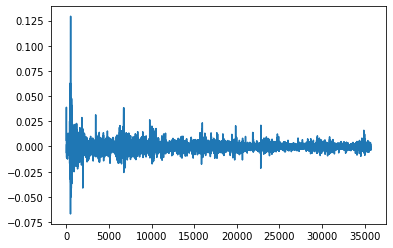

In [ ]:
X_asset = train.copy()
X_asset = get_features_hist(X_asset)
X_asset["Target_shifted"] = X_asset["Target"].shift(num_shift)
X_asset["Target"].plot()

train_end_idx[asset_id], val_end_idx[asset_id]
# features = ["Target_shifted"]
features = ["Target_shifted", "m", "upper_shadow", "lower_shadow", "open2close", "high2low", "volume2count", "close2vwap"] 
target = ["Target"]
X_asset.loc[X_asset.is_real==0, features] = 0 
X_asset[features] = X_asset[features].fillna(0)
scaler = MinMaxScaler()
X_asset[features] = scaler.fit_transform(X_asset[features])  # TODO: NEEDS TO BE SEPARATED FOR TRAIN TEST
 
train_generator = sample_generator(X_asset.loc[:train_end_idx[asset_id], features], 
                                   X_asset.loc[:train_end_idx[asset_id], target], 
                                   length = WINDOW_SIZE, batch_size = BATCH_SIZE, prediction_length=prediction_length)
val_generator = sample_generator(X_asset.loc[train_end_idx[asset_id]:val_end_idx[asset_id], features], 
                                 X_asset.loc[train_end_idx[asset_id]:val_end_idx[asset_id], target], 
                                 length = WINDOW_SIZE, batch_size = BATCH_SIZE, prediction_length=prediction_length)
test_generator = sample_generator(X_asset.loc[val_end_idx[asset_id]:, features], 
                                  X_asset.loc[val_end_idx[asset_id]:, target], 
                                  length = WINDOW_SIZE, batch_size = BATCH_SIZE, prediction_length=prediction_length)

print("BATCH_SIZE: ", BATCH_SIZE)
print(f'Train batch shape: {train_generator[0][0].shape}')
print(f'Target batch shape: {train_generator[0][1].shape}')

print("Num batches of train, validation and test generator: ", len(train_generator),", ", len(val_generator),", ", len(test_generator))
print("Num Training Samples: ", len(train_generator)*BATCH_SIZE)

# <span class="title-section w3-xxlarge" id="training">Training 🏋️</span>
<hr>

Our model will be trained for the number of FOLDS and EPOCHS you chose in the configuration above. Each fold the model with lowest validation loss will be saved and used to predict OOF and test. Adjust the variable `VERBOSE`. The variable `VERBOSE=1 or 2` will display the training and validation loss for each epoch as text. 

In [ ]:
class Time2Vec(keras.layers.Layer):
    def __init__(self, kernel_size=1):
        super(Time2Vec, self).__init__(trainable=True, name='Time2VecLayer')
        self.k = kernel_size
    
    def build(self, input_shape):  # build automatically executed before layer is called for the first time --  mostly used to instantiate weights
        # trend
        self.wb = self.add_weight(name='wb',shape=(input_shape[1],),initializer='uniform',trainable=True)
        self.bb = self.add_weight(name='bb',shape=(input_shape[1],),initializer='uniform',trainable=True)
        # periodic
        self.wa = self.add_weight(name='wa',shape=(1, input_shape[1], self.k),initializer='uniform',trainable=True)
        self.ba = self.add_weight(name='ba',shape=(1, input_shape[1], self.k),initializer='uniform',trainable=True)
        super(Time2Vec, self).build(input_shape)
    
    def call(self, inputs, **kwargs):  # where the layer logic lives
        bias = self.wb * inputs + self.bb
        dp = K.dot(inputs, self.wa) + self.ba
        wgts = K.sin(dp) # or K.cos(.)

        ret = K.concatenate([K.expand_dims(bias, -1), wgts], -1)
        ret = K.reshape(ret, (-1, inputs.shape[1]*(self.k+1)))
        return ret
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*(self.k + 1))
    

# https://towardsdatascience.com/time2vec-for-time-series-features-encoding-a03a4f3f937e
class T2V(keras.layers.Layer):
    
    def __init__(self, output_dim=None, **kwargs):
        self.output_dim = output_dim
        super(T2V, self).__init__(**kwargs)
        
    def build(self, input_shape):        
        self.W = self.add_weight(name='W',
                      shape=(input_shape[-1], self.output_dim),
                      initializer='uniform',
                      trainable=True)        
        self.P = self.add_weight(name='P',
                      shape=(input_shape[1], self.output_dim),
                      initializer='uniform',
                      trainable=True)        
        self.w = self.add_weight(name='w',
                      shape=(input_shape[1], 1),
                      initializer='uniform',
                      trainable=True)        
        self.p = self.add_weight(name='p',
                      shape=(input_shape[1], 1),
                      initializer='uniform',
                      trainable=True)        
        super(T2V, self).build(input_shape)
        
    def call(self, x):
        
        original = self.w * x + self.p
        sin_trans = K.sin(K.dot(x, self.W) + self.P)
        
        return K.concatenate([sin_trans, original], -1)

In [ ]:
# https://towardsdatascience.com/the-time-series-transformer-2a521a0efad3
from tensorflow_addons.layers import MultiHeadAttention

class AttentionBlock(keras.Model):
    def __init__(self, name='AttentionBlock', num_heads=2, head_size=128, ff_dim=None, dropout=0, **kwargs):
        super().__init__(name=name, **kwargs)

        if ff_dim is None:
            ff_dim = head_size

        self.attention = MultiHeadAttention(num_heads=num_heads, head_size=head_size, dropout=dropout)
        self.attention_dropout = keras.layers.Dropout(dropout)
        self.attention_norm = keras.layers.BatchNormalization(epsilon=1e-6)

        self.ff_conv1 = keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation='relu')
        # self.ff_conv2 at build()
        self.ff_dropout = keras.layers.Dropout(dropout)
        self.ff_norm = keras.layers.BatchNormalization(epsilon=1e-6)

    def build(self, input_shape):
        self.ff_conv2 = keras.layers.Conv1D(filters=input_shape[-1], kernel_size=1) 

    def call(self, inputs):
        x = self.attention([inputs, inputs])
        x = self.attention_dropout(x)
        x = self.attention_norm(inputs + x)

        x = self.ff_conv1(x)
        x = self.ff_conv2(x)
        x = self.ff_dropout(x)

        x = self.ff_norm(inputs + x)
        return x
    

class ModelTrunk(keras.Model):
    def __init__(self, name='ModelTrunk', time2vec_dim=1, num_heads=2, head_size=128, ff_dim=None, num_layers=1, dropout=0, **kwargs):
        super().__init__(name=name, **kwargs)
        self.time2vec = Time2Vec(kernel_size=time2vec_dim)
        if ff_dim is None:
            ff_dim = head_size
        self.dropout = dropout
        self.attention_layers = [AttentionBlock(num_heads=num_heads, head_size=head_size, ff_dim=ff_dim, dropout=dropout) for _ in range(num_layers)]

        
    def call(self, inputs):
        time_embedding = keras.layers.TimeDistributed(self.time2vec)(inputs)
        x = K.concatenate([inputs, time_embedding], -1)
        for attention_layer in self.attention_layers:
            x = attention_layer(x)

        return K.reshape(x, (-1, x.shape[1] * x.shape[2])) # flat vector of features out
    

def build_model_new(
    input_shape,  # shape of time series sample
    head_size, # size of multi head attention
    num_heads,  # number of multi-head attention 
    ff_dim,  # 
    num_transformer_blocks, # 
    mlp_units, # list of N dense layers with i neurons
    dropout=0,  # transformer block dropout rate
    mlp_dropout=0,  # 
    time2vec_dim=3
):
    inputs = keras.Input(shape=input_shape)
    
    x = ModelTrunk(num_heads=num_heads, head_size=head_size, ff_dim=ff_dim, num_layers=num_transformer_blocks, time2vec_dim=time2vec_dim, dropout=dropout)(inputs)

    # x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, kernel_initializer="normal")(x)
    return keras.Model(inputs, outputs)


# https://github.com/tatp22/multidim-positional-encoding/blob/master/positional_encodings/tf_positional_encodings.py
class TFPositionalEncoding1D(tf.keras.layers.Layer):
    def __init__(self, channels: int, dtype=tf.float32):
        """
        Args:
            channels int: The last dimension of the tensor you want to apply pos emb to.
        Keyword Args:
            dtype: output type of the encodings. Default is "tf.float32".
        """
        super(TFPositionalEncoding1D, self).__init__()

        self.channels = int(np.ceil(channels / 2) * 2)
        self.inv_freq = np.float32(
            1
            / np.power(
                10000, np.arange(0, self.channels, 2) / np.float32(self.channels)
            )
        )

    @tf.function
    def call(self, inputs):
        """
        :param tensor: A 3d tensor of size (batch_size, x, ch)
        :return: Positional Encoding Matrix of size (batch_size, x, ch)
        """
        if len(inputs.shape) != 3:
            raise RuntimeError("The input tensor has to be 3d!")
        _, x, org_channels = inputs.shape

        dtype = self.inv_freq.dtype
        pos_x = tf.range(x, dtype=dtype)
        sin_inp_x = tf.einsum("i,j->ij", pos_x, self.inv_freq)
        emb = tf.expand_dims(tf.concat((tf.sin(sin_inp_x), tf.cos(sin_inp_x)), -1), 0)
        emb = emb[0]  # A bit of a hack
        return tf.repeat(emb[None, :, :org_channels], tf.shape(inputs)[0], axis=0)        
        

In [ ]:
# https://keras.io/examples/timeseries/timeseries_transformer_classification/

from tensorflow import keras
from tensorflow.keras import layers


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.BatchNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.BatchNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# self.time2vec = Time2Vec(kernel_size=time2vec_dim)

def build_model(
    input_shape,  # shape of time series sample
    head_size, # size of multi head attention
    num_heads,  # number of multi-head attention 
    ff_dim,  # 
    num_transformer_blocks, # 
    mlp_units, # list of N dense layers with i neurons
    dropout=0,  # transformer block dropout rate
    mlp_dropout=0,  # 
    time2vec_dim=1
):
    inputs = keras.Input(shape=input_shape)
    
    time_embedding = TFPositionalEncoding1D(channels=input_shape[-1])(inputs)
    x = tf.keras.layers.Add()([inputs, time_embedding])
    
    # x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, kernel_initializer="normal")(x)
    return keras.Model(inputs, outputs)


In [ ]:
input_shape = train_generator[0][0].shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128, 128],
    mlp_dropout=0.1,
    dropout=0.1,
    time2vec_dim=TIME2VEC_DIM
)

# tfp.stats.correlation
#tf_corr_new = tfp.stats.correlation(x, y=None, sample_axis=0, event_axis=-1, keepdims=False, name=None)
# tf.contrib.metrics.streaming_pearson_correlation(logits,labels)

# model.compile(
#     optimizer="Adam",
#     loss={"head1": "mse", "head2": "mse"},
#     loss_weights={"head1": HEAD1_WEIGHT, "head2": HEAD2_WEIGHT},
#     metrics={"head1": ["mae"], "head2": ["mae"]}
# )
# 
loss_func = combined_loss
model.compile(
    loss=loss_func,
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    metrics=["mae", tfp.stats.correlation],
)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 8)]      0                                            
__________________________________________________________________________________________________
tf_positional_encoding1d (TFPos (None, 64, 8)        0           input_2[0][0]                    
__________________________________________________________________________________________________
add (Add)                       (None, 64, 8)        0           input_2[0][0]                    
                                                                 tf_positional_encoding1d[0][0]   
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 64, 8)        32          add[0][0]                  

In [ ]:
# input_shape = train_generator[0][0].shape[1:]
# 
# model = build_model_new(
#     input_shape,
#     head_size=256,
#     num_heads=4,
#     ff_dim=4,
#     num_transformer_blocks=8,
#     mlp_units=[128, 128],
#     mlp_dropout=0.1,
#     dropout=0.1,
#     time2vec_dim=TIME2VEC_DIM
# )
# 
# model.compile(
#     loss="mae",
#     optimizer=keras.optimizers.Adam(learning_rate=1e-2),
#     metrics=["mae", tf_wcorr],
# )
# model.summary()

In [ ]:
def lr_scheduler(epoch, lr, warmup_epochs=15, decay_epochs=100, initial_lr=1e-6, base_lr=1e-3, min_lr=5e-5):
    if epoch <= warmup_epochs:
        pct = epoch / warmup_epochs
        return ((base_lr - initial_lr) * pct) + initial_lr

    if epoch > warmup_epochs and epoch < warmup_epochs+decay_epochs:
        pct = 1 - ((epoch - warmup_epochs) / decay_epochs)
        return ((base_lr - min_lr) * pct) + min_lr

    return min_lr



In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_correlation', mode='max',patience=5, restore_best_weights=True)]
callbacks += [keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]
filepath = "./transformer_model"
callbacks += [keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)]

EPOCHS = 10
history = model.fit(
            train_generator, 
            validation_data = (val_generator),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=callbacks)

model.evaluate(test_generator, verbose=1)

Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 1e-06.
445/445 [==============================] - 38s 67ms/step - loss: 0.1175 - mae: 0.2359 - correlation: 8.3939e-04 - val_loss: 0.1016 - val_mae: 0.2231 - val_correlation: 0.0198

Epoch 00001: val_loss improved from inf to 0.10163, saving model to ./transformer_model


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 6.76e-05.
445/445 [==============================] - 29s 64ms/step - loss: 0.0323 - mae: 0.0772 - correlation: 0.0126 - val_loss: 0.0566 - val_mae: 0.1813 - val_correlation: 0.0680

Epoch 00002: val_loss improved from 0.10163 to 0.05662, saving model to ./transformer_model


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001342.
445/445 [==============================] - 28s 63ms/step - loss: 0.0040 - mae: 0.0603 - correlation: 0.0523 - val_loss: -0.0088 - val_mae: 0.0622 - val_correlation: 0.0798

Epoch 00003: val_loss improved from 0.05662 to -0.00882, saving model to ./transformer_model


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.00020080000000000003.
445/445 [==============================] - 28s 64ms/step - loss: -0.0131 - mae: 0.0517 - correlation: 0.0779 - val_loss: 0.0369 - val_mae: 0.0578 - val_correlation: -0.0161

Epoch 00004: val_loss did not improve from -0.00882
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.00026740000000000005.
445/445 [==============================] - 29s 65ms/step - loss: -0.0228 - mae: 0.0402 - correlation: 0.0859 - val_loss: -0.0216 - val_mae: 0.0120 - val_correlation: 0.0551

Epoch 00005: val_loss improved from -0.00882 to -0.02156, saving model to ./transformer_model


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10

Epoch 00006: LearningRateScheduler setting learning rate to 0.00033400000000000004.
445/445 [==============================] - 29s 65ms/step - loss: -0.0245 - mae: 0.0409 - correlation: 0.0899 - val_loss: -0.0022 - val_mae: 0.0582 - val_correlation: 0.0626

Epoch 00006: val_loss did not improve from -0.02156
Epoch 7/10

Epoch 00007: LearningRateScheduler setting learning rate to 0.0004006000000000001.
445/445 [==============================] - 28s 62ms/step - loss: -0.0593 - mae: 0.0252 - correlation: 0.1438 - val_loss: -0.0386 - val_mae: 0.0599 - val_correlation: 0.1371

Epoch 00007: val_loss improved from -0.02156 to -0.03858, saving model to ./transformer_model


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/10

Epoch 00008: LearningRateScheduler setting learning rate to 0.0004672000000000001.
445/445 [==============================] - 28s 62ms/step - loss: -0.0664 - mae: 0.0202 - correlation: 0.1531 - val_loss: -0.1068 - val_mae: 0.0389 - val_correlation: 0.2525

Epoch 00008: val_loss improved from -0.03858 to -0.10681, saving model to ./transformer_model


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 9/10

Epoch 00009: LearningRateScheduler setting learning rate to 0.0005338000000000001.
445/445 [==============================] - 27s 61ms/step - loss: -0.0733 - mae: 0.0164 - correlation: 0.1629 - val_loss: -0.0973 - val_mae: 0.0245 - val_correlation: 0.2192

Epoch 00009: val_loss did not improve from -0.10681
Epoch 10/10

Epoch 00010: LearningRateScheduler setting learning rate to 0.0006004000000000001.
445/445 [==============================] - 27s 61ms/step - loss: -0.0962 - mae: 0.0170 - correlation: 0.2093 - val_loss: -0.0520 - val_mae: 0.0268 - val_correlation: 0.1308

Epoch 00010: val_loss did not improve from -0.10681
54/54 [==============================] - 1s 24ms/step - loss: -0.0334 - mae: 0.0294 - correlation: 0.0961


[-0.033364370465278625, 0.02939314767718315, 0.09612186998128891]

In [ ]:
# tf.keras.utils.plot_model(get_model(), show_shapes=True)

In [ ]:
# EPOCHS = 100
# seed = 1 
# 
# tf.random.set_seed(seed)
# estop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0, mode = 'min',restore_best_weights = True)
# # scheduler = keras.optimizers.schedules.ExponentialDecay(1e-3, (0.5 * len(X_train) / BATCH_SIZE), 1e-3)
# # lr = keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
# mcp_save = keras.callbacks.ModelCheckpoint('model_multivariate_min_val_loss', save_best_only=True, monitor='val_loss', mode='min')
# plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min')
# 
# history = model.fit(train_generator, validation_data = (val_generator), epochs = EPOCHS, callbacks = [estop, mcp_save, plateau], verbose=1)
# model.save("model_multivariate")



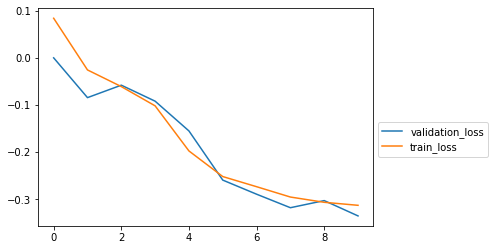

In [ ]:
plt.plot(history.history['val_loss'], label= "validation_loss")
plt.plot(history.history['loss'], label= "train_loss")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()

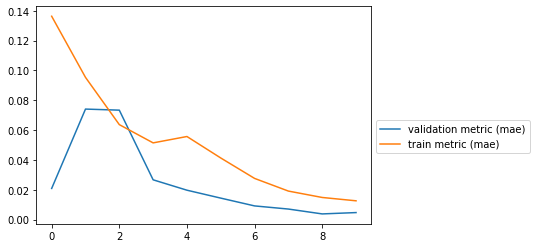

In [ ]:
plt.plot(history.history['val_mae'], label= "validation metric (mae)")
plt.plot(history.history['mae'], label= "train metric (mae)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'correlation', 'val_loss', 'val_mae', 'val_correlation', 'lr'])

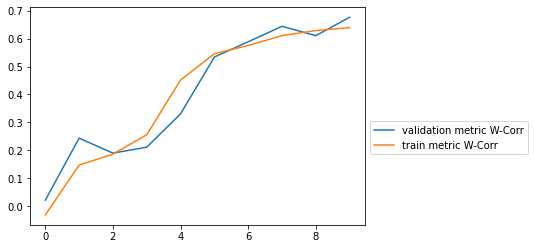

In [ ]:
plt.plot(history.history['val_correlation'], label= "validation metric W-Corr")
plt.plot(history.history['correlation'], label= "train metric W-Corr")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# create predictions on training set
predictions = model.predict(train_generator)
y_true = []
for x,y in train_generator: y_true.append(y)
y_true = np.squeeze(np.concatenate(y_true), axis=-1)


print(predictions.shape, y_true.shape)
assert predictions.shape == y_true.shape, f"{predictions.shape}, {y_true.shape}"

# Evaluate predictions on validation set
print("Window Size: ", WINDOW_SIZE)
print("Prediction length: ", prediction_length)
print("Epochs: ", EPOCHS)

print('---------------------')
print('Asset:    Corr. coef.')
print('---------------------')
asset_w_corr = []
asset_corrs = []
asset_mae = []
y_true = np.squeeze(y_true)
y_pred = np.squeeze(predictions)
real_target_ind = np.argwhere(y_true!=0)
# asset_id = list(assets_order.keys())[i]
# asset_name = assets[assets.Asset_ID == asset_id]['Asset_Name'].item()
mae_asset = mae(y_true, y_pred)
asset_corr = np.corrcoef(np.nan_to_num(y_pred.flatten()), np.nan_to_num(y_true.flatten()))[0,1]

print(f"corr: {asset_corr:.4f}")
print(f"mae: {mae_asset:.4f}")
print("\n")
print(f"Predictions Min: {predictions.min()}, Predictions Max: {predictions.max()}, Predictions mean:{predictions.mean()}, Predictions var:{predictions.var()}") 
print(f"y_true Min: {y_true.min()}, y_true Max: {y_true.max()}, y_true mean:{y_true.mean()}, y_true var:{y_true.var()}") 

(28480, 1) (28480, 1)
Window Size:  64
Prediction length:  1
Epochs:  10
---------------------
Asset:    Corr. coef.
---------------------
corr: 0.3798
mae: 0.0085


Predictions Min: -0.82203608751297, Predictions Max: 0.6891940236091614, Predictions mean:-0.00030043613514862955, Predictions var:0.0006620517815463245
y_true Min: -0.06692692637443542, y_true Max: 0.12924709916114807, y_true mean:9.333968773717061e-05, y_true var:2.5452485715504736e-05


In [ ]:
# create predictions on validation set
predictions = model.predict(val_generator)
y_true = []
for x,y in val_generator: y_true.append(y)
y_true = np.squeeze(np.concatenate(y_true), axis=-1)


print(predictions.shape, y_true.shape)
assert predictions.shape == y_true.shape, f"{predictions.shape}, {y_true.shape}"

# Evaluate predictions on validation set
print("Window Size: ", WINDOW_SIZE)
print("Prediction length: ", prediction_length)
print("Epochs: ", EPOCHS)

print('---------------------')
print('Asset:    Corr. coef.')
print('---------------------')
asset_w_corr = []
asset_corrs = []
asset_mae = []
y_true = np.squeeze(y_true)
y_pred = np.squeeze(predictions)
real_target_ind = np.argwhere(y_true!=0)
# asset_id = list(assets_order.keys())[i]
# asset_name = assets[assets.Asset_ID == asset_id]['Asset_Name'].item()
mae_asset = mae(y_true, y_pred)
asset_corr = np.corrcoef(np.nan_to_num(y_pred.flatten()), np.nan_to_num(y_true.flatten()))[0,1]

print(f"corr: {asset_corr:.4f}")
print(f"mae: {mae_asset:.4f}")
print("\n")
print(f"Predictions Min: {predictions.min()}, Predictions Max: {predictions.max()}, Predictions mean:{predictions.mean()}, Predictions var:{predictions.var()}") 
print(f"y_true Min: {y_true.min()}, y_true Max: {y_true.max()}, y_true mean:{y_true.mean()}, y_true var:{y_true.var()}") 

(3456, 1) (3456, 1)
Window Size:  64
Prediction length:  1
Epochs:  10
---------------------
Asset:    Corr. coef.
---------------------
corr: 0.6892
mae: 0.0047


Predictions Min: -0.030504096299409866, Predictions Max: 0.039875004440546036, Predictions mean:-0.0010224042925983667, Predictions var:5.996235631755553e-05
y_true Min: -0.00931723602116108, y_true Max: 0.010553549975156784, y_true mean:-0.00014779226330574602, y_true var:5.8813193390960805e-06


In [ ]:
# create predictions on validation set
predictions = model.predict(test_generator)
y_true = []
for x,y in test_generator: y_true.append(y)
y_true = np.squeeze(np.concatenate(y_true), axis=-1)


print(predictions.shape, y_true.shape)
assert predictions.shape == y_true.shape, f"{predictions.shape}, {y_true.shape}"

# Evaluate predictions on validation set
print("Window Size: ", WINDOW_SIZE)
print("Prediction length: ", prediction_length)
print("Epochs: ", EPOCHS)

asset_w_corr = []
asset_corrs = []
asset_mae = []
y_true = np.squeeze(y_true)
predictions = np.squeeze(predictions)
real_target_ind = np.argwhere(y_true!=0)
# asset_id = list(assets_order.keys())[i]
# asset_name = assets[assets.Asset_ID == asset_id]['Asset_Name'].item()
mae_asset = mae(y_true, predictions)
asset_corr = np.corrcoef(np.nan_to_num(y_pred.flatten()), np.nan_to_num(y_true.flatten()))[0,1]

print('---------------------')
print('Asset:    Corr. coef.')
print('---------------------')
print(f"corr: {asset_corr:.4f}")
print(f"mae: {mae_asset:.4f}")
print("\n")
print(f"Predictions Min: {predictions.min()}, Predictions Max: {predictions.max()}, Predictions mean:{predictions.mean()}, Predictions var:{predictions.var()}") 
print(f"y_true Min: {y_true.min()}, y_true Max: {y_true.max()}, y_true mean:{y_true.mean()}, y_true var:{y_true.var()}") 



(3456, 1) (3456, 1)
Window Size:  64
Prediction length:  1
Epochs:  10
---------------------
Asset:    Corr. coef.
---------------------
corr: -0.0540
mae: 0.0039


Predictions Min: -0.024076171219348907, Predictions Max: 0.04401088133454323, Predictions mean:-0.001201344421133399, Predictions var:4.027350223623216e-05
y_true Min: -0.009781436994671822, y_true Max: 0.016066623851656914, y_true mean:2.7860420232173055e-05, y_true var:5.2875429901177995e-06
